In [1]:
import re
import os
import glob
import numpy as np
import pandas as pd

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [2]:
product = 'rgpf'

# so = 'linux'
so = 'windows'

In [3]:
if so == 'linux':
    file_dir = '/mnt/Data/Data/PF/'+product+'_SA/*.csv'

elif so == 'windows':
    file_dir = 'E:'+os.sep+'Data'+os.sep+'PF'+os.sep+'rgpf_SA'+os.sep+'rgpf*.csv'

else:
    print(f'ERROR: Option so: {so}')

print(f'so: {so}')
print()

file_list = glob.glob(file_dir)
file_list = sorted(file_list)
len_files = len(file_list)

print(f'Number of files: {len_files}')
print()

andes = list(shpreader.Reader('..'+os.sep+'mapping'+os.sep+'andes_1000.shp').geometries())

print(f'File 1 : {file_list[0]}')
print(f'File -1: {file_list[-1]}')

so: windows

Number of files: 85

File 1 : E:\Data\PF\rgpf_SA\rgpf_201403_level2.csv
File -1: E:\Data\PF\rgpf_SA\rgpf_202103_level2.csv


In [10]:
count = 0
for nn in range(len_files):

    if so == 'linux':
        file_in = file_list[nn].split('/')[-1]
    elif so == 'windows':
        file_in = file_list[nn].split('\\')[-1]

    file_tmp = re.split('[_ |. ]', file_in)[1]
    year = file_tmp[0:4]
    month = file_tmp[4:6]

    if month == '01' or month == '02' or month == '12':

        if count == 0:
            data_tmp = pd.read_csv(file_list[nn])
            data = data_tmp

        else:
            data_tmp = pd.read_csv(file_list[nn])
            data = pd.concat([data, data_tmp])

        print(year, month, count, len(data_tmp), len(data))

        count += 1

2014 12 0 28453 28453
2015 01 1 27027 55480
2015 02 2 26543 82023
2015 12 3 26250 108273
2016 01 4 27092 135365
2016 02 5 26561 161926
2016 12 6 29852 191778
2017 01 7 31504 223282
2017 02 8 30581 253863
2017 12 9 30141 284004
2018 01 10 32942 316946
2018 02 11 32699 349645
2018 12 12 29499 379144
2019 01 13 33514 412658
2019 02 14 31201 443859
2019 12 15 33091 476950
2020 01 16 33249 510199
2020 02 17 32024 542223
2020 12 18 35355 577578
2021 01 19 38796 616374
2021 02 20 33639 650013


In [12]:
# export dataframe to csv
if so == 'linux':
    salida = '/mnt/Data/Data/PF/rgpf_SA_season/rgpf_2014_2021_summer.csv'

elif so == 'windows':
    salida = 'E:'+os.sep+'Data'+os.sep+'PF'+os.sep+'rgpf_SA_season'+os.sep+'rgpf_2014_2021_summer.csv'

print(f'Exporting data to {salida}')
data.to_csv(salida,header=True,index=False)

Exporting data to E:\Data\PF\rgpf_SA_season\rgpf_2014_2021_summer.csv


In [13]:
data

,lat,lon,YEAR,ORBIT,NPIXELS_20DBZ,NPIXELS_30DBZ,NPIXELS_40DBZ,NPIXELS_50DBZ,NPIXELS_20MM,NPIXELS_30MM,...,MIN85PCT,NLT250,NLT225,N37LT250,N37LT225,MAXHT20,MAXHT30,MAXHT40,NSTRAT_KU,NCONV_KU
0,14.920553,-82.734344,2014.0,4300.0,1.0,0.0,0.0,0.0,0.0,0.0,...,287.109985,0.0,0.0,0.0,0.0,2.88,0.00,0.00,0.0,1.0
1,14.809609,-81.027560,2014.0,4300.0,2.0,1.0,0.0,0.0,0.0,0.0,...,282.769989,0.0,0.0,0.0,0.0,3.25,1.50,0.00,0.0,2.0
2,14.286827,-80.558685,2014.0,4300.0,49.0,26.0,3.0,0.0,0.0,0.0,...,264.540009,0.0,0.0,0.0,0.0,8.00,7.12,4.88,30.0,39.0
3,13.910675,-81.263054,2014.0,4300.0,27.0,13.0,1.0,0.0,0.0,0.0,...,259.799988,0.0,0.0,0.0,0.0,8.25,6.38,2.62,9.0,29.0
4,12.447679,-80.457310,2014.0,4300.0,288.0,122.0,12.0,0.0,1.0,0.0,...,257.959991,0.0,0.0,0.0,0.0,8.88,7.12,3.38,108.0,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33634,13.845942,-71.477130,2021.0,39795.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285.290009,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,1.0
33635,14.455017,-72.425964,2021.0,39795.0,5.0,3.0,0.0,0.0,0.0,0.0,...,282.929993,0.0,0.0,0.0,0.0,2.88,2.88,0.00,0.0,6.0
33636,14.396589,-72.042496,2021.0,39795.0,12.0,3.0,1.0,0.0,0.0,0.0,...,281.320007,0.0,0.0,0.0,0.0,3.62,2.88,2.00,0.0,15.0
33637,14.537724,-72.597115,2021.0,39795.0,1.0,0.0,0.0,0.0,0.0,0.0,...,285.820007,0.0,0.0,0.0,0.0,2.38,0.00,0.00,0.0,1.0


Exporting figure as ../images/rgpf_maxht40.png


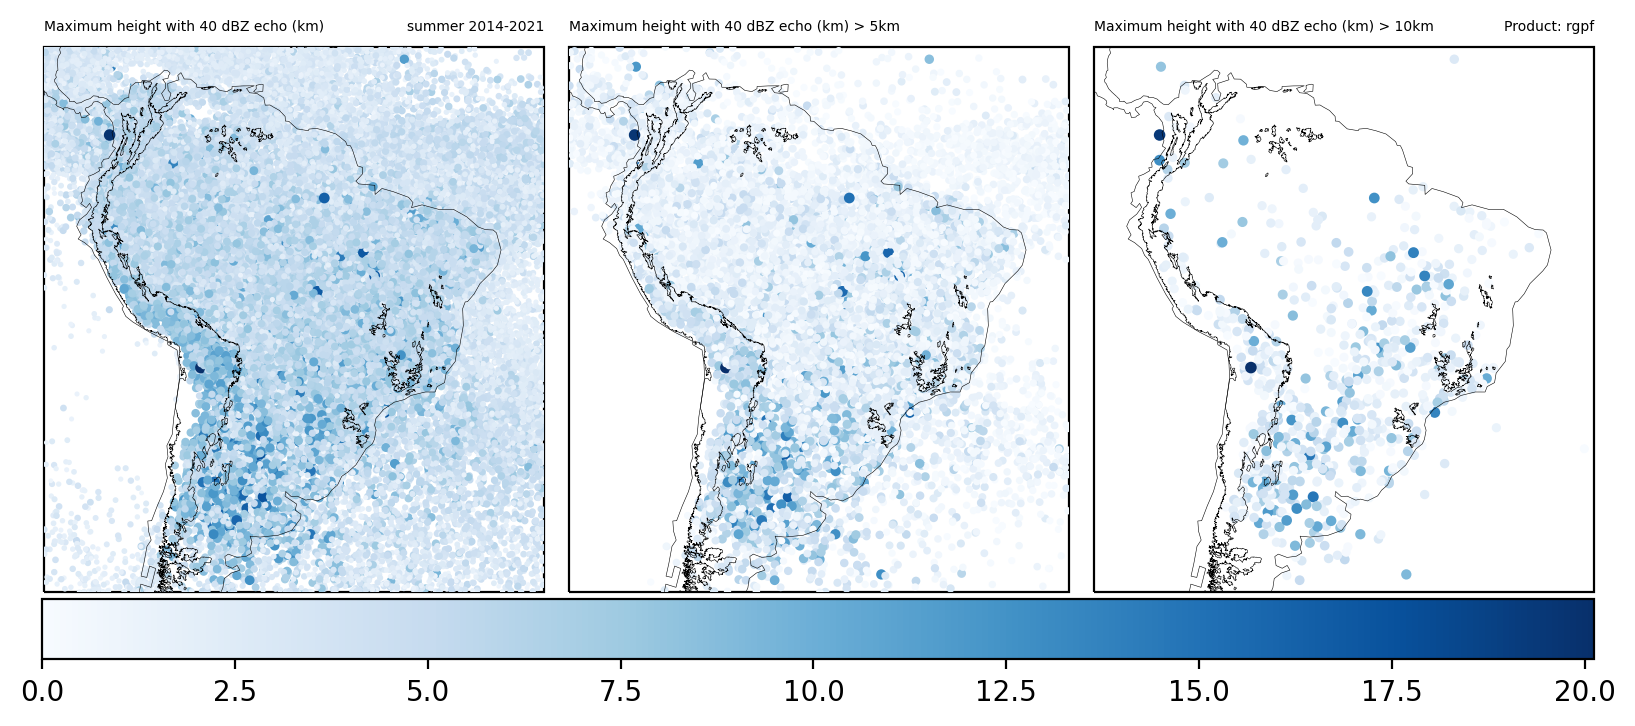

In [14]:
alt_ref = 5
alt_ref2 = 10

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
cmap = plt.cm.Blues

ticks = np.arange(0,18,3)

fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(data['lon'],data['lat'],c=data['MAXHT40'],cmap=cmap,s=data['MAXHT40']/2,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=5,loc='left')
ax1.set_title('summer 2014-2021',fontsize=5,loc='right')

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data['lon'][data['MAXHT40']>alt_ref],data['lat'][data['MAXHT40']>alt_ref],c=data['MAXHT40'][data['MAXHT40']>alt_ref],
                cmap=cmap,s=data['MAXHT40'][data['MAXHT40']>alt_ref]/2,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=5,loc='left')

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data['lon'][data['MAXHT40']>alt_ref2],data['lat'][data['MAXHT40']>alt_ref2],c=data['MAXHT40'][data['MAXHT40']>alt_ref2],
                cmap=cmap,s=data['MAXHT40'][data['MAXHT40']>alt_ref2]/2,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref2)+'km',fontsize=5,loc='left')
ax1.set_title('Product: '+product,fontsize=5,loc='right')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.22, 0.776, 0.05])
fig.colorbar(a1, cax = cbaxes,ticks=None,orientation="horizontal")

salida = '../images/'+product+'_maxht40.png'
print(f'Exporting figure as {salida}')
# plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)

Exporting figure as ../images/rgpf_min85PCT.png


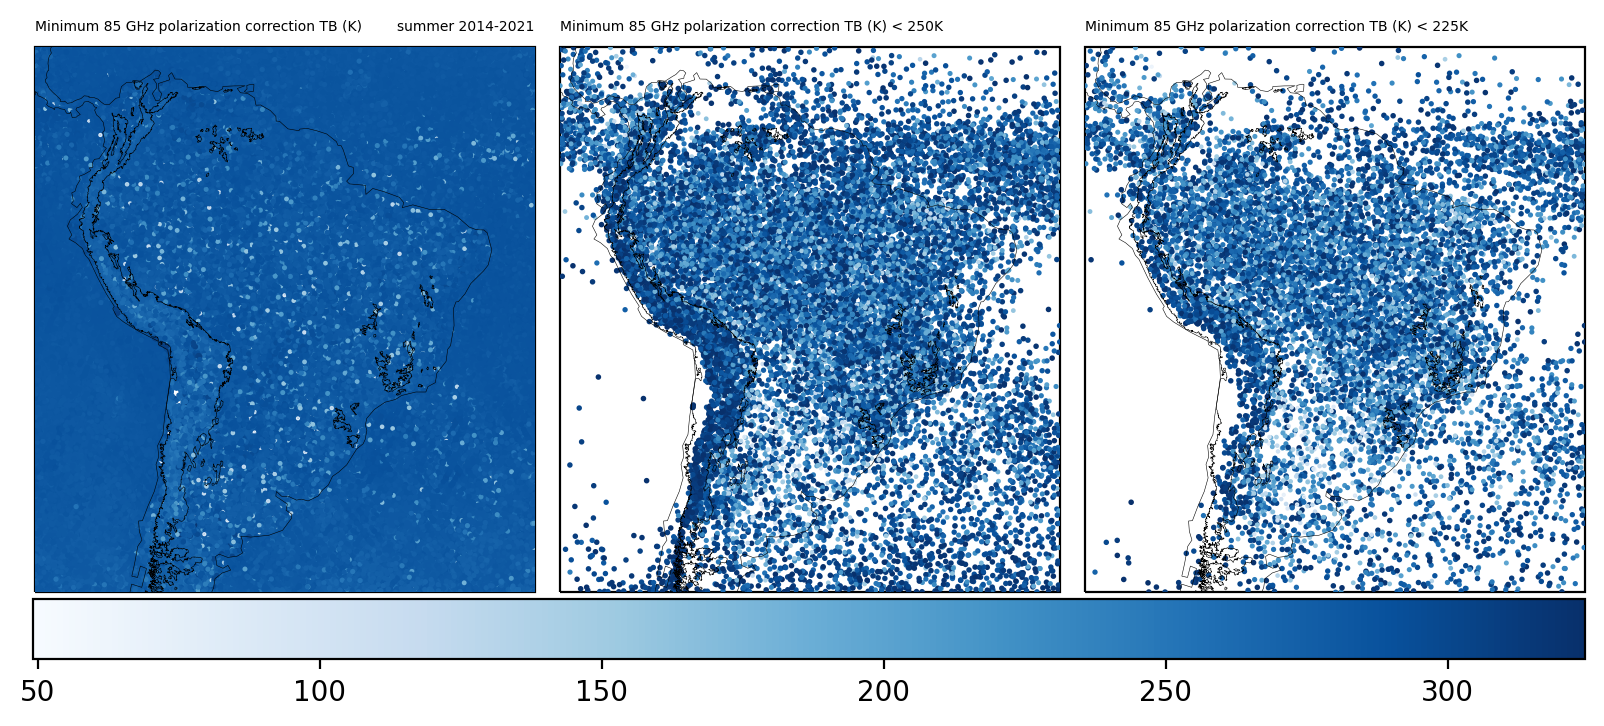

In [15]:
temp_1 = 250
temp_2 = 225

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
cmap = plt.cm.Blues

ticks = np.arange(0,18,3)

fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(data['lon'],data['lat'],c=data['MIN85PCT'],cmap=cmap,s=data['MIN85PCT']/np.max(data['MIN85PCT']),zorder=3)
ax1.set_title('Minimum 85 GHz polarization correction TB (K)',fontsize=5,loc='left')
ax1.set_title('summer 2014-2021',fontsize=5,loc='right')

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data['lon'][data['MIN85PCT']<temp_1],data['lat'][data['MIN85PCT']<temp_1],c=data['MIN85PCT'][data['MIN85PCT']<temp_1],
                cmap=cmap,s=data['MIN85PCT'][data['MIN85PCT']<temp_1]/temp_1,zorder=3)
ax1.set_title('Minimum 85 GHz polarization correction TB (K) < '+str(temp_1)+'K',fontsize=5,loc='left')

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
ax1.scatter(data['lon'][data['MIN85PCT']<temp_2],data['lat'][data['MIN85PCT']<temp_2],c=data['MIN85PCT'][data['MIN85PCT']<temp_2],
                cmap=cmap,s=data['MIN85PCT'][data['MIN85PCT']<temp_2]/temp_2,zorder=3)
ax1.set_title('Minimum 85 GHz polarization correction TB (K) < '+str(temp_2)+'K',fontsize=5,loc='left')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.22, 0.776, 0.05])
fig.colorbar(a1, cax = cbaxes,ticks=None,orientation="horizontal")

salida = '../images/'+product+'_min85PCT.png'
print(f'Exporting figure as {salida}')
# plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)

Text(1.0, 1.0, 'summer 2014-2021')

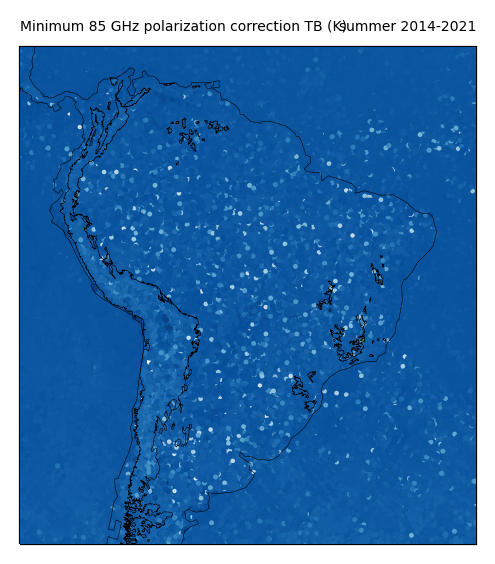

In [16]:
proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
cmap = plt.cm.Blues

ticks = np.arange(0,18,3)

fig = plt.figure(figsize=(10,6),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-85,-30,-45,15],crs=proj)
a1 = ax1.scatter(data['lon'],data['lat'],c=data['MIN85PCT'],cmap=cmap,s=data['MIN85PCT']/np.max(data['MIN85PCT']),zorder=3)
ax1.set_title('Minimum 85 GHz polarization correction TB (K)',fontsize=5,loc='left')
ax1.set_title('summer 2014-2021',fontsize=5,loc='right')